# **Import Lib**

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import neighbors,datasets,preprocessing
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
import math


# **Import Data**

In [105]:
data = pd.read_csv("diamonds.csv")
data.head()
# cut (เจียรไน):
# color:
# clarity (clean):
# depth:
# table
# price
# x()
# y()
# z()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


# **Clean Data**

In [106]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

new_colors = {"D": 7, "E": 6,"F": 5,"G": 4,"H": 3,"I": 2,"J": 1}
data["color"].replace(new_colors, inplace=True)

new_clarity = {"FL":10,  "IF": 9, "VVS1": 8, "VVS2": 7, "VS1": 6, "VS2": 5, "SI1": 4, "SI2": 3, "SI3": 2, "I1": 1}
data["clarity"].replace(new_clarity, inplace=True)

new_cut = {"Ideal": 5, "Premium": 4, "Very Good": 3, "Good": 2, "Fair": 1}
data["cut"] .replace(new_cut, inplace=True)

data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,4,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,6,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,3,63.3,58.0,335,4.34,4.35,2.75
5,0.24,3,1,7,62.8,57.0,336,3.94,3.96,2.48
6,0.24,3,2,8,62.3,57.0,336,3.95,3.98,2.47
7,0.26,3,3,4,61.9,55.0,337,4.07,4.11,2.53
8,0.22,1,6,5,65.1,61.0,337,3.87,3.78,2.49
9,0.23,3,3,6,59.4,61.0,338,4.00,4.05,2.39


In [107]:
def gradeTable(table):
    if 53<=table<=58:
        return 8
    elif 52<=table<=60:
        return 7
    elif 51.5<=table<=63:
        return 6
    elif 51<=table<=64:
        return 5
    elif 50.5<=table<=67:
        return 4
    elif 50<=table<=70:
        return 3
    elif 49<=table<=72:
        return 2
    else:
        return 1
def gradeDepth(depth):
    if 58<=depth<=62.3:
        return 3
    elif 58.3<=62.9:
        return 2
    else:
        return 1
for i in range(len(data)):
    data["table"][i]=gradeTable(data["table"][i])
    data["depth"][i]=gradeDepth(data["depth"][i])
data.head(10)

C:\Users\user\AppData\Local\Temp/ipykernel_1656/2662039005.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["table"][i]=gradeTable(data["table"][i])
C:\Users\user\AppData\Local\Temp/ipykernel_1656/2662039005.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["depth"][i]=gradeDepth(data["depth"][i])


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,3,3.0,8.0,326,3.95,3.98,2.43
1,0.21,4,6,4,3.0,6.0,326,3.89,3.84,2.31
2,0.23,2,6,6,2.0,4.0,327,4.05,4.07,2.31
3,0.29,4,2,5,2.0,8.0,334,4.20,4.23,2.63
4,0.31,2,1,3,2.0,8.0,335,4.34,4.35,2.75
5,0.24,3,1,7,2.0,8.0,336,3.94,3.96,2.48
6,0.24,3,2,8,3.0,8.0,336,3.95,3.98,2.47
7,0.26,3,3,4,3.0,8.0,337,4.07,4.11,2.53
8,0.22,1,6,5,2.0,6.0,337,3.87,3.78,2.49
9,0.23,3,3,6,3.0,6.0,338,4.00,4.05,2.39


In [111]:
a=data[data["carat"]==1]
print(a["price"].min(),a["price"].max(),a["price"].mean())
print(len(a))
a

1681 16469 5241.589858793325
1558


,carat,cut,color,clarity,depth,table,price,x,y,z
284,1.0,4,2,3,3.0,7.0,2795,6.61,6.55,3.83
324,1.0,4,1,3,3.0,8.0,2801,6.45,6.34,3.98
369,1.0,1,4,1,2.0,7.0,2808,6.16,6.09,4.07
384,1.0,1,1,5,2.0,7.0,2811,6.14,6.07,4.01
465,1.0,4,3,1,3.0,7.0,2818,6.43,6.39,3.93
...,...,...,...,...,...,...,...,...,...,...
53353,1.0,5,1,3,3.0,8.0,2657,6.49,6.38,3.94
53564,1.0,4,3,1,3.0,7.0,2695,6.39,6.43,3.93
53692,1.0,2,5,1,2.0,7.0,2717,6.26,6.30,4.03
53745,1.0,1,4,1,3.0,8.0,2723,6.39,6.28,3.91


In [112]:
a.corr()


,carat,cut,color,clarity,depth,table,price,x,y,z
carat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cut,NaN,1.000000,0.020809,0.045327,0.457734,0.242400,0.203293,0.229793,0.226721,-0.111531
color,NaN,0.020809,1.000000,-0.034716,0.041001,0.017390,0.360721,0.007593,0.053555,0.011791
clarity,NaN,0.045327,-0.034716,1.000000,0.029037,0.012238,0.792808,0.034841,0.064401,0.015319
depth,NaN,0.457734,0.041001,0.029037,1.000000,-0.173249,0.129285,0.287129,0.298327,-0.256522
table,NaN,0.242400,0.017390,0.012238,-0.173249,1.000000,0.087593,-0.106261,-0.078493,0.217252
price,NaN,0.203293,0.360721,0.792808,0.129285,0.087593,1.000000,0.080609,0.151651,-0.000455
x,NaN,0.229793,0.007593,0.034841,0.287129,-0.106261,0.080609,1.000000,0.948639,0.325666
y,NaN,0.226721,0.053555,0.064401,0.298327,-0.078493,0.151651,0.948639,1.000000,0.314373
z,NaN,-0.111531,0.011791,0.015319,-0.256522,0.217252,-0.000455,0.325666,0.314373,1.000000


In [66]:
a.corr().sort_values("price")["price"]

z         -0.135661
table     -0.041840
y         -0.022829
depth      0.048378
x          0.104439
cut        0.228579
color      0.304230
clarity    0.474737
price      1.000000
carat           NaN
Name: price, dtype: float64

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

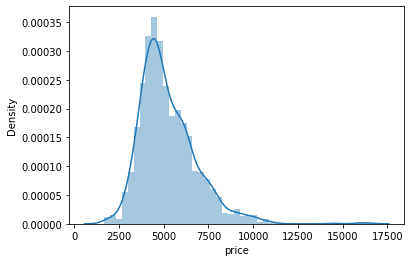

In [51]:
sns.distplot(a["price"])

# **Check Data**

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  int64  
 2   color    53940 non-null  int64  
 3   clarity  53940 non-null  int64  
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(4)
memory usage: 4.1 MB


In [44]:
# print(data["table"])
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.355074,-0.082894,-0.131790,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.192692,0.425651,0.391479,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.023079,0.035451,0.025027,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.355074,0.192692,-0.023079,1.000000,0.136780,0.124922,-0.144217,-0.373021,-0.359150,-0.368309
depth,-0.082894,0.425651,0.035451,0.136780,1.000000,-0.032966,-0.033060,-0.055353,-0.049037,-0.122197
table,-0.131790,0.391479,0.025027,0.124922,-0.032966,1.000000,-0.083141,-0.143967,-0.133993,-0.101817
price,0.921591,-0.053491,-0.172511,-0.144217,-0.033060,-0.083141,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.373021,-0.055353,-0.143967,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.359150,-0.049037,-0.133993,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.368309,-0.122197,-0.101817,0.861249,0.970772,0.952006,1.000000


z         -0.135661
table     -0.041840
y         -0.022829
depth      0.048378
x          0.104439
cut        0.228579
color      0.304230
clarity    0.474737
price      1.000000
carat           NaN
Name: price, dtype: float64

# **Relation of Data**

In [142]:
# sns.pairplot(data)

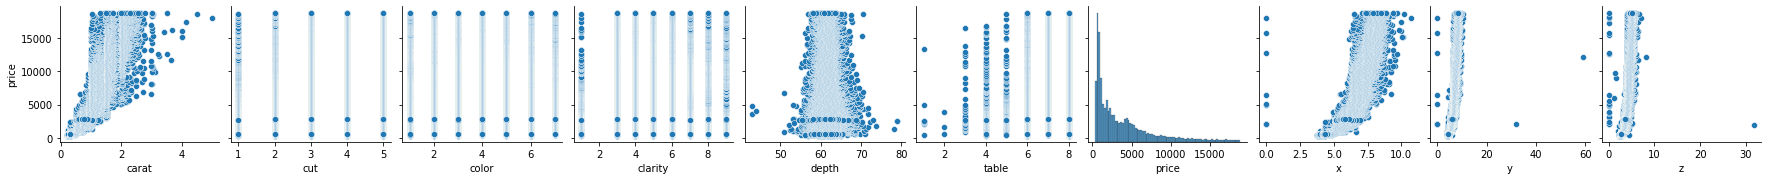

In [26]:
sns.pairplot(data,x_vars=data.columns,y_vars=["price"])

C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

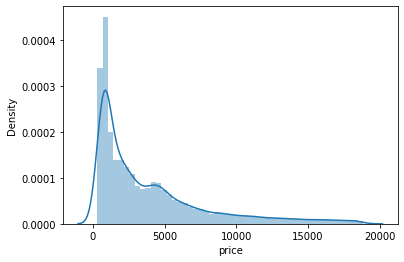

In [144]:
sns.distplot(data["price"])
#กระจายตัว

## covarian matrix and correlation

In [145]:
#Covarian Matrix
carat_minus_bar = data["carat"]-data["carat"].mean()
cut_minus_bar = data["cut"]-data["cut"].mean()
color_minus_bar = data["color"]-data["color"].mean()
clarity_minus_bar = data["clarity"]-data["clarity"].mean()
depth_minus_bar = data["depth"]-data["depth"].mean()
table_minus_bar = data["table"]-data["table"].mean()
price_minus_bar = data["price"]-data["price"].mean()
x_minus_bar = data["x"]-data["x"].mean()
y_minus_bar = data["y"]-data["y"].mean()
z_minus_bar = data["z"]-data["z"].mean()

x_mat = np.array([carat_minus_bar,cut_minus_bar,color_minus_bar,clarity_minus_bar,depth_minus_bar,table_minus_bar,price_minus_bar,x_minus_bar,y_minus_bar,z_minus_bar])
cov_mat = (x_mat.dot(x_mat.T))/len(data)
for i in cov_mat:
    for j in i:
        print("{:14,.4f}".format(j),end=" ")
    print()

        0.2247        -0.0714        -0.2350        -0.2822         0.0192         0.1924     1,742.7331         0.5185         0.5152         0.3189 
       -0.0714         1.2468         0.0390         0.3607        -0.3488        -1.0813      -238.2755        -0.1573        -0.1549        -0.1177 
       -0.2350         0.0390         2.8937        -0.0658        -0.1152        -0.1006    -1,170.7159        -0.5158        -0.5121        -0.3220 
       -0.2822         0.3607        -0.0658         2.8104        -0.1725        -0.6017      -964.5088        -0.7015        -0.6877        -0.4357 
        0.0192        -0.3488        -0.1152        -0.1725         2.0524        -0.9468       -60.8526        -0.0406        -0.0480         0.0960 
        0.1924        -1.0813        -0.1006        -0.6017        -0.9468         4.9929     1,133.2971         0.4896         0.4690         0.2380 
    1,742.7331      -238.2755    -1,170.7159      -964.5088       -60.8526     1,133.2971 15,9

In [28]:
data.corr()


,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,-0.134967,-0.291437,-0.355074,0.028224,-0.131790,0.921591,0.975094,0.951722,0.953387
cut,-0.134967,1.000000,0.020519,0.192692,-0.218055,0.391479,-0.053491,-0.125565,-0.121462,-0.149323
color,-0.291437,0.020519,1.000000,-0.023079,-0.047279,0.025027,-0.172511,-0.270287,-0.263584,-0.268227
clarity,-0.355074,0.192692,-0.023079,1.000000,-0.071840,0.124922,-0.144217,-0.373021,-0.359150,-0.368309
depth,0.028224,-0.218055,-0.047279,-0.071840,1.000000,0.286016,-0.010647,-0.025289,-0.029341,0.094924
table,-0.131790,0.391479,0.025027,0.124922,0.286016,1.000000,-0.083141,-0.143967,-0.133993,-0.101817
price,0.921591,-0.053491,-0.172511,-0.144217,-0.010647,-0.083141,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.125565,-0.270287,-0.373021,-0.025289,-0.143967,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.121462,-0.263584,-0.359150,-0.029341,-0.133993,0.865421,0.974701,1.000000,0.952006
z,0.953387,-0.149323,-0.268227,-0.368309,0.094924,-0.101817,0.861249,0.970772,0.952006,1.000000


<AxesSubplot:>

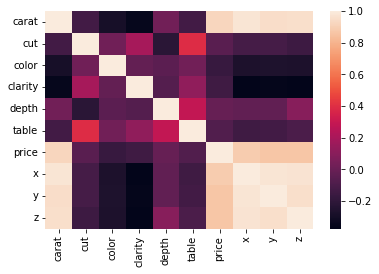

In [27]:
sns.heatmap(data.corr())

# **Start Model**

## sort correlation

In [148]:
#check relation about "price"
data.corr().sort_values("price")["price"]

color     -0.172511
clarity   -0.144217
cut       -0.053491
depth     -0.010647
table      0.127134
z          0.861249
y          0.865421
x          0.884435
carat      0.921591
price      1.000000
Name: price, dtype: float64

# First Model

## Select data

In [149]:
#select data
X = data[["carat","x"]]
y = data["price"]


## Create model

In [150]:
#create model
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)
scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
y_test

46519     1781
8639      4452
23029      631
51641      544
25789    14775
         ...  
26078    15308
26584    16300
35767      912
29891      710
41204     1205
Name: price, Length: 10788, dtype: int64

In [151]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Get result

In [152]:
print(f"coef[1] = {lm.coef_[0]} coef[2] = {lm.coef_[1]}")
print(f"intercept = {lm.intercept_}")

coef[1] = 4800.854555276829 coef[2] = -1154.9507769457741
intercept = 3925.486257879124


## Check RMSE

In [153]:
y_predicted = lm.predict(X_test)
rmse = mean_squared_error(y_test,y_predicted,squared=False)
mape = mean_absolute_percentage_error(y_test,y_predicted)
print(mape)

0.2799537170978843


## Test First Model 

In [154]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,5,6,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,4,6,4,59.8,61.0,326,3.89,3.84,2.31
2,0.23,2,6,6,56.9,65.0,327,4.05,4.07,2.31
3,0.29,4,2,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,2,1,3,63.3,58.0,335,4.34,4.35,2.75


In [155]:
y_hat = []
for i in range(len(data)):
    y=lm.coef_[0]*data["carat"][i]+lm.coef_[1]*data["x"][i]+lm.intercept_
    y=int(y)
    y_hat.append(y)
data["y_predicted"]=y_hat
data.tail(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,y_predicted
53930,0.71,4,6,4,60.5,55.0,2756,5.79,5.74,3.49,646
53931,0.71,4,5,4,59.8,62.0,2756,5.74,5.73,3.43,704
53932,0.70,3,6,5,60.5,59.0,2757,5.71,5.76,3.47,691
53933,0.70,3,6,5,61.2,59.0,2757,5.69,5.72,3.49,714
53934,0.72,4,7,4,62.7,59.0,2757,5.69,5.73,3.58,810
53935,0.72,5,7,4,60.8,57.0,2757,5.75,5.76,3.50,741
53936,0.72,2,7,4,63.1,55.0,2757,5.69,5.75,3.61,810
53937,0.70,3,7,4,62.8,60.0,2757,5.66,5.68,3.56,749
53938,0.86,4,3,3,61.0,58.0,2757,6.15,6.12,3.74,951
53939,0.75,5,7,3,62.2,55.0,2757,5.83,5.87,3.64,792


## Rsquare & Pearson

In [156]:
ssr = []
sst = [1]
ymean = data["price"].mean()
print(ymean)
for i in range(len(data)):
    b = (data["y_predicted"][i] - ymean)**2
    a = (data["price"][i] - ymean)**2
    ssr.append(b)
    sst.append(a)
ssr=sum(ssr)
sst=sum(sst)
rsqaure=ssr/sst
rsqaure


3932.799721913237


0.5608587250115896

In [157]:
vecU = data["price"]-data["price"].mean()
vecV = data["y_predicted"]-data["y_predicted"].mean()
vecUnp=np.array(vecU)
vecVnp=np.array(vecV)

dd=vecUnp.dot(vecVnp)
sum_u=0
sum_v=0
for i in range(len(data)):
    sum_u+=vecU[i]**2
    sum_v+=vecV[i]**2
sc_vecU=math.sqrt(sum_u)
sc_vecV=math.sqrt(sum_v)
pearson=dd/(sc_vecU*sc_vecV)
pearson

0.9040546566342154

In [158]:
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z,y_predicted
carat,1.000000,-0.134967,-0.291437,-0.355074,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.961997
cut,-0.134967,1.000000,0.020519,0.192692,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323,-0.137273
color,-0.291437,0.020519,1.000000,-0.023079,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227,-0.297463
clarity,-0.355074,0.192692,-0.023079,1.000000,-0.071840,-0.160630,-0.144217,-0.373021,-0.359150,-0.368309,-0.308600
depth,0.028224,-0.218055,-0.047279,-0.071840,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.092170
table,0.181618,-0.433405,-0.026465,-0.160630,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.152247
price,0.921591,-0.053491,-0.172511,-0.144217,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.904055
x,0.975094,-0.125565,-0.270287,-0.373021,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.877476
y,0.951722,-0.121462,-0.263584,-0.359150,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.858081
z,0.953387,-0.149323,-0.268227,-0.368309,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.866520


# Second Model

In [159]:
#second model
#Least Square Estimation
#least mean square

sig_xp2=0
sig_xz=0
sig_x=sum(data["carat"])
sig_zp2=0
sig_z=sum(data["x"])
N=len(data)
sig_xy=0
sig_zy=0
sig_y=sum(data["price"])
for i in range(len(data)):
    sig_xp2+=data["carat"][i]**2
    sig_zp2+=data["x"][i]**2
    sig_xy+=data["carat"][i]*data["price"][i]
    sig_xz+=data["carat"][i]*data["x"][i]
    sig_zy+=data["x"][i]*data["price"][i]

co_mtx=np.array([ [sig_xp2,sig_xz,sig_x],[sig_xz,sig_zp2,sig_z],[sig_x,sig_z,N] ])
ans_mtx=np.array([ [sig_xy],[sig_zy],[sig_y] ])
print(co_mtx)



# zeta2 = 10125.997449775457978
# zeta1 = -1026.8596838629419674
# zeta0 = 1737.9581525196355441


[[  46463.39469999  274640.508        43040.87      ]
 [ 274640.508      1839596.01960004  309138.61999999]
 [  43040.87        309138.61999999   53940.        ]]


## Cramer's rule find zeta

In [160]:
#Cramer
temp_mtx=np.array([x for x in co_mtx])
det_comtx=np.linalg.det(co_mtx)
varr2=sig_xy
varr1=sig_zy
varr0=sig_y
zeta=[]
for i in range(3):
    temp_mtx[0][i]=varr2
    temp_mtx[1][i]=varr1
    temp_mtx[2][i]=varr0
    det_tempmtx=np.linalg.det(temp_mtx)
    zeta.append(det_tempmtx/det_comtx)
    temp_mtx=np.array([x for x in co_mtx])
print(zeta)

[10125.987670900531, -1026.8568541721115, 1737.9497380698292]


## Test second model

In [161]:
#Least Square Estimation
#least mean square
y_hat2=[]
for i in range(len(data)):
    y2=10125.997449775457978*data["carat"][i]-1026.8596838629419674*data["x"][i]+1737.9581525196355441
    y2=int(y2)
    y_hat2.append(y2)
data["y_predicted2"]=y_hat2
data.head(10)

,carat,cut,color,clarity,depth,table,price,x,y,z,y_predicted,y_predicted2
0,0.23,5,6,3,61.5,55.0,326,3.95,3.98,2.43,467,10
1,0.21,4,6,4,59.8,61.0,326,3.89,3.84,2.31,440,-130
2,0.23,2,6,6,56.9,65.0,327,4.05,4.07,2.31,352,-91
3,0.29,4,2,5,62.4,58.0,334,4.20,4.23,2.63,466,361
4,0.31,2,1,3,63.3,58.0,335,4.34,4.35,2.75,401,420
5,0.24,3,1,7,62.8,57.0,336,3.94,3.96,2.48,527,122
6,0.24,3,2,8,62.3,57.0,336,3.95,3.98,2.47,515,112
7,0.26,3,3,4,61.9,55.0,337,4.07,4.11,2.53,473,191
8,0.22,1,6,5,65.1,61.0,337,3.87,3.78,2.49,512,-8
9,0.23,3,3,6,59.4,61.0,338,4.00,4.05,2.39,409,-40


## Pearson & Rsquare

In [162]:
vecU2 = data["price"]-data["price"].mean()
vecV2 = data["y_predicted2"]-data["y_predicted2"].mean()

vecUnp2 = np.array(vecU2)
vecVnp2 = np.array(vecV2)
dd2 = vecUnp2.dot(vecVnp2)

sum_u2 = 0
sum_v2 = 0
for i in range(len(data)):
    sum_u2 += vecU2[i]**2
    sum_v2 += vecV2[i]**2
sc_vecU2 = math.sqrt(sum_u2)
sc_vecV2 = math.sqrt(sum_v2)
pearson2 = dd2/(sc_vecU2*sc_vecV2)
pearson2

0.9238136636405908

In [163]:
ssr = []
sst = []
ymean = data["price"].mean()
print(ymean)
for i in range(len(data)):
    b = (data["y_predicted2"][i]-ymean)**2
    a = (data["price"][i]-ymean)**2
    ssr.append(b)
    sst.append(a)
ssr = sum(ssr)
sst = sum(sst)
rsqaure = ssr/sst
rsqaure

3932.799721913237


0.8534308238003104

In [164]:
data.head(10)
data.corr()

,carat,cut,color,clarity,depth,table,price,x,y,z,y_predicted,y_predicted2
carat,1.000000,-0.134967,-0.291437,-0.355074,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387,0.961997,0.997594
cut,-0.134967,1.000000,0.020519,0.192692,-0.218055,-0.433405,-0.053491,-0.125565,-0.121462,-0.149323,-0.137273,-0.136531
color,-0.291437,0.020519,1.000000,-0.023079,-0.047279,-0.026465,-0.172511,-0.270287,-0.263584,-0.268227,-0.297463,-0.295078
clarity,-0.355074,0.192692,-0.023079,1.000000,-0.071840,-0.160630,-0.144217,-0.373021,-0.359150,-0.368309,-0.308600,-0.345847
depth,0.028224,-0.218055,-0.047279,-0.071840,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924,0.092170,0.044661
table,0.181618,-0.433405,-0.026465,-0.160630,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929,0.152247,0.175477
price,0.921591,-0.053491,-0.172511,-0.144217,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249,0.904055,0.923814
x,0.975094,-0.125565,-0.270287,-0.373021,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772,0.877476,0.957374
y,0.951722,-0.121462,-0.263584,-0.359150,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006,0.858081,0.934842
z,0.953387,-0.149323,-0.268227,-0.368309,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000,0.866520,0.938239
